In [435]:
import pandas as pd
import matplotlib as plt
from plotnine import *
police= pd.read_csv('austin_tx_police.csv')

In [436]:
police.info()
police.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483255 entries, 0 to 483254
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   raw_row_number                        483255 non-null  object 
 1   date                                  483255 non-null  object 
 2   subject_age                           480091 non-null  float64
 3   subject_race                          483253 non-null  object 
 4   subject_sex                           482881 non-null  object 
 5   officer_id_hash                       483255 non-null  object 
 6   type                                  372991 non-null  object 
 7   contraband_found                      19256 non-null   object 
 8   contraband_drugs                      19256 non-null   object 
 9   contraband_weapons                    19256 non-null   object 
 10  frisk_performed                       483255 non-null  bool   
 11  

,raw_row_number,date,subject_age,subject_race,subject_sex,officer_id_hash,type,contraband_found,contraband_drugs,contraband_weapons,...,vehicle_year,raw_ethnicity,raw_person_search_search_based_on,raw_person_search_search_discovered,raw_person_searched,raw_vehicle_search_search_based_on,raw_vehicle_search_search_discovered,raw_vehicle_searched,raw_race_description,raw_street_check_description
0,141,2006-01-07,53.0,white,female,59c9092a79,vehicular,False,False,False,...,1996.0,NaN,NaN,NaN,YES = -,NaN,NaN,YES = -,WHITE,WARNING
1,4819,2006-03-21,21.0,white,male,46f8ed46eb,vehicular,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
2,4820,2006-03-21,43.0,black,female,0d1d4fb150,vehicular,NaN,NaN,NaN,...,2003.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,BLACK,WARNING
3,4821,2006-04-20,46.0,hispanic,male,c70bca9788,NaN,NaN,NaN,NaN,...,1994.0,H,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
4,4822,2006-03-21,25.0,white,male,e3f693e058,vehicular,NaN,NaN,NaN,...,2002.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
5,4824,2006-04-20,65.0,white,male,c70bca9788,NaN,NaN,NaN,NaN,...,1991.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
6,4823,2006-04-20,65.0,white,male,c70bca9788,NaN,NaN,NaN,NaN,...,1995.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
7,4826,2006-04-20,25.0,hispanic,male,c70bca9788,NaN,NaN,NaN,NaN,...,1983.0,H,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
8,4825,2006-04-20,25.0,hispanic,male,c70bca9788,NaN,NaN,NaN,NaN,...,1994.0,H,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING
9,4827,2006-03-21,49.0,white,male,60a3625dbd,vehicular,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NO = -,NaN,NaN,NO= -,WHITE,WARNING


Most of the columns are loaded as strings. A lot of cleanup needed. Select columns of interest

In [437]:
police = police.iloc[:,1:20]
police = police.drop(['officer_id_hash'], axis=1)

#Convert date column to datetime object
police['date'] = pd.to_datetime(police['date'], format='%Y-%m-%d')

#create new year column
police['year_of_date'] = police['date'].dt.year
police['year_of_date'] = police['year_of_date'].astype('category')

In [438]:
police.subject_race.value_counts(dropna=False)

white                     268058
hispanic                  123943
black                      72324
asian/pacific islander     13167
unknown                     3135
other                       2626
NaN                            2
Name: subject_race, dtype: int64

In [439]:
#updating  'unknown' and NaN subject race to 'other'
police.loc[(police['subject_race']=='unknown') | (police['subject_race'].isnull()),'subject_race' ] = 'other'

In [440]:
police.subject_race.value_counts(dropna=False)

white                     268058
hispanic                  123943
black                      72324
asian/pacific islander     13167
other                       5763
Name: subject_race, dtype: int64

In [441]:
#converting race to category type
police.subject_race=police.subject_race.astype('category')
police.subject_race.dtypes

CategoricalDtype(categories=['asian/pacific islander', 'black', 'hispanic', 'other',
                  'white'],
                 ordered=False)

In [442]:
police.subject_sex.value_counts(dropna=False)

male      340018
female    142863
NaN          374
Name: subject_sex, dtype: int64

In [443]:
#There is 374 incidents with unknown gender saved as NaN. Converting NaNs to unknown, just in case they reveal some information down the road
police.loc[police['subject_sex'].isnull(),'subject_sex'] = 'other'
police.subject_sex.value_counts(dropna=False)

male      340018
female    142863
other        374
Name: subject_sex, dtype: int64

In [444]:
police.type.value_counts(dropna=False)

vehicular    372991
NaN          110264
Name: type, dtype: int64

In [445]:
#converting type=NaN to 'other'
police.loc[police.type.isnull(), 'type'] = 'other'
police.type.value_counts()

vehicular    372991
other        110264
Name: type, dtype: int64

In [446]:
police.contraband_found.value_counts(dropna=False)

True     463999
False     14484
True       4772
Name: contraband_found, dtype: int64

In [447]:
#It appears that there is some issue with whitespace. Lets strip it out
police.contraband_found = police.contraband_found.astype(str).str.strip()

In [448]:
police.contraband_found.value_counts(dropna=False)

nan      463999
False     14484
True       4772
Name: contraband_found, dtype: int64

Leaving NaN for now as they are coerced to NaN when no search was conducted per openpolice data desccription

In [449]:
police.contraband_drugs.value_counts(dropna=False)

True     463999
False     18977
True        279
Name: contraband_drugs, dtype: int64

In [450]:
#It appears there is some issue with whitespace in this column as well. Getting rid of whitespace
police.contraband_drugs = police.contraband_drugs.astype(str).str.strip()
police.contraband_drugs.value_counts(dropna=False)

nan      463999
False     18977
True        279
Name: contraband_drugs, dtype: int64

In [451]:
police.contraband_weapons = police.contraband_weapons.astype(str).str.strip()
police.contraband_weapons.value_counts(dropna=False)

nan      463999
False     18344
True        912
Name: contraband_weapons, dtype: int64

In [452]:
police.frisk_performed.value_counts(dropna=False)

False    472820
True      10435
Name: frisk_performed, dtype: int64

In [453]:
police.search_conducted.value_counts(dropna=False)

False    463999
True      19256
Name: search_conducted, dtype: int64

In [454]:
police.search_person.value_counts(dropna=False)

False    466975
True      16280
Name: search_person, dtype: int64

In [455]:
police.search_basis.value_counts(dropna=False)

NaN               463999
probable cause     15633
consent             3195
other                276
plain view           152
Name: search_basis, dtype: int64

In [456]:
police.reason_for_stop.value_counts(dropna=False)

VIOLATION OF TRANSPORTATION/VEHICLE LAWS                                                     353672
OTHER                                                                                         44717
VIOLATION OF CITY ORDINANCE                                                                   43431
CALL FOR SERVICE                                                                              17722
SUSPICIOUS PERSON / VEHICLE                                                                   16528
                                                                                              ...  
VIOLATION OF TRANSPORTATION/VEHICLE LAWS|SUSPICIOUS PERSON / VEHICLE|MOTOR VEHICLE DRIVER         1
SUSPICIOUS PERSON / VEHICLE|VIOLATION OF CITY ORDINANCE|OTHER                                     1
OTHER|WATER SAFETY ACT                                                                            1
VIOLATION OF PENAL CODE|OTHER|MOTOR VEHICLE DRIVER                                                1


In [457]:
police.vehicle_make.value_counts(dropna=False)

FORD    55066
CHEV    53090
TOYT    39194
HOND    35705
NISS    24609
        ...  
BURK        1
MARM        1
TORI        1
VANT        1
TRST        1
Name: vehicle_make, Length: 1510, dtype: int64

In [458]:
police.vehicle_model.value_counts(dropna=False)

NaN     333529
ACC       6147
CIV       5297
F15       5271
CAM       4609
         ...  
NV C         1
C6G          1
1987         1
GX46         1
GS40         1
Name: vehicle_model, Length: 2282, dtype: int64

In [459]:
police.vehicle_registration_state.value_counts(dropna=False)

TX     440405
NaN      7296
OK       4910
IL       2595
TN       2551
CA       2501
IN       2403
FL       1837
LA       1668
ME       1219
MO       1137
OH        831
GA        831
MI        794
AR        760
AZ        756
IA        699
NC        692
WI        685
NM        641
CO        638
AL        602
KS        535
MN        525
MS        506
NE        496
OR        464
VA        437
PA        417
NY        382
WA        370
KY        286
SC        286
NJ        270
MA        226
UT        215
MD        215
NV        201
MT        128
SD        113
CT        112
ID        107
AK        102
ND         86
NH         72
WY         46
WV         42
RI         40
HI         40
DE         31
DC         28
VT         26
Name: vehicle_registration_state, dtype: int64

In [460]:
police.vehicle_year.value_counts(dropna=False)

NaN       110570
2007.0     28365
2006.0     26423
2005.0     24646
2004.0     21913
           ...  
3003.0         1
3002.0         1
2996.0         1
2994.0         1
2044.0         1
Name: vehicle_year, Length: 130, dtype: int64

In [461]:
year_subject_race_count = police.groupby(['year_of_date','subject_race'], as_index=False)['date'].count()
year_subject_race_count.columns = ['year','subject_race','count']

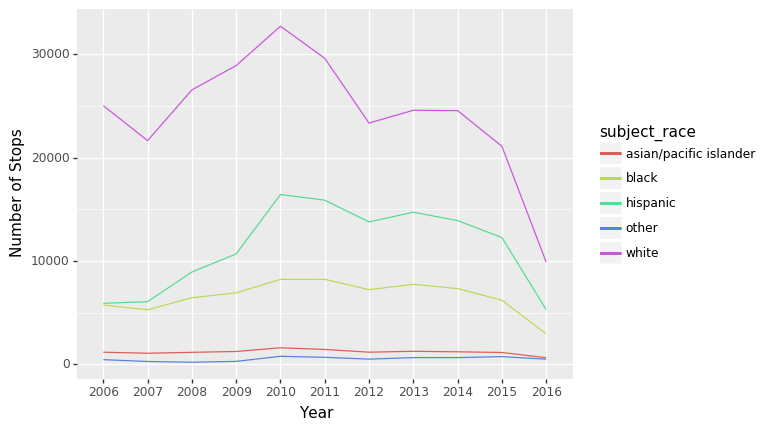

<ggplot: (8774451063749)>

In [462]:
ggplot(year_subject_race_count, aes(x='year', y='count', group='subject_race', color='subject_race')) + geom_line() + labs(x='Year', y='Number of Stops')

The trend looks almost similar amongst white/ Hispanic and black races. Whites were pulled over more often than any other race in Austin area but without incorporating individual race population this graph does not paint a clear picture. Lets looks at the percentage of total number of pull overs by race per year.

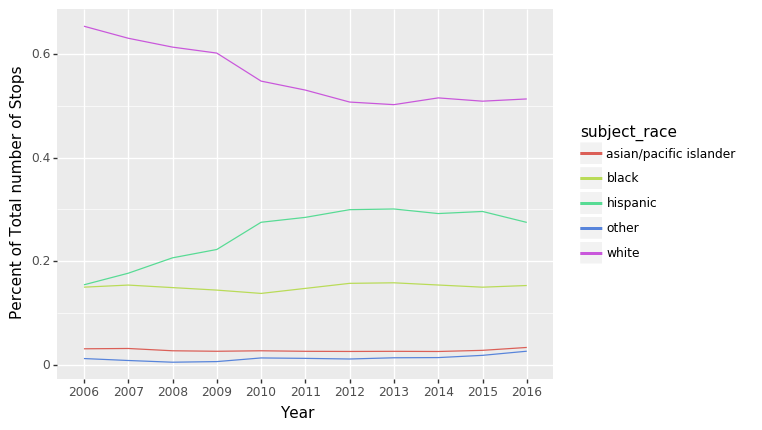

<ggplot: (8774444849473)>

In [463]:
year_subject_race_count['pct_count'] = year_subject_race_count.groupby(['year'])['count'].apply(lambda x: x/x.sum())
ggplot(year_subject_race_count, aes(x='year', y='pct_count', group='subject_race', color='subject_race')) + geom_line() + labs(x='Year', y='Percent of Total number of Stops')

This graph paints a different picture. Percent of total number of stops has been consistent for black, asian/pacific highlander and others. While, it has decreased for white and increased for hispanics. Again, this could be due to population variation among different races in each year.

/home/sumit/.local/lib/python3.7/site-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


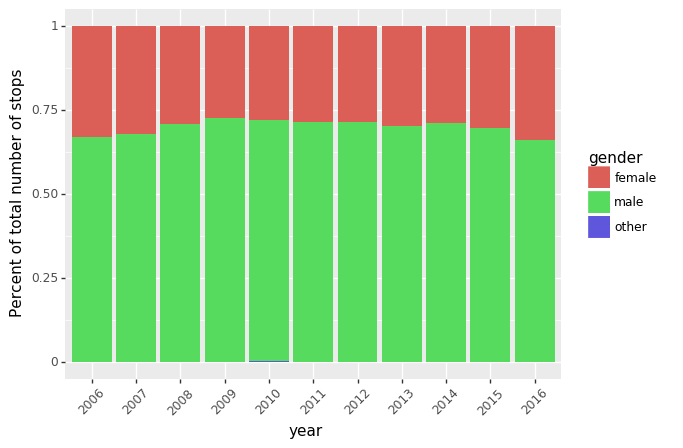

<ggplot: (8774444856573)>

In [464]:
year_gender_count=police.groupby(['year_of_date', 'subject_sex'], as_index=False)['date'].count()
year_gender_count.columns = ['year','gender','count_incidents']
#year_sex_count['pct_count']=year_sex_count.groupby(['year'])['count'].apply(lambda x: x/sum(x))
(ggplot(year_gender_count, aes(x='year',y='count_incidents', fill='gender')) 
 + geom_bar(stat='identity',position='fill')
 + labs(x='year', y='Percent of total number of stops')
 + theme(axis_text_x=element_text(angle=45)))


It is clear from the plot that males are pulled over more often than females. There were a few observations without gender information showing up as other in the legend. That population is so small that you can barely see it in the bar chart in 2010.

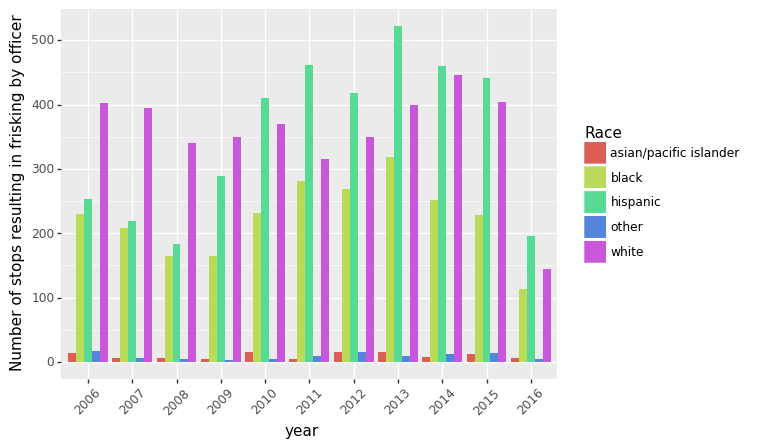

<ggplot: (8774461054313)>

In [465]:
year_frisk_race = police[police['frisk_performed']==True].groupby(['year_of_date', 'subject_race'], as_index=False)['frisk_performed'].count()
year_frisk_race.columns = ['year','race','count']
(ggplot(year_frisk_race, aes(x='year', y='count', fill='race')) 
  + geom_bar(stat='identity', position='dodge')
  + labs(x='year', y='Number of stops resulting in frisking by officer', fill='Race')
  + theme(axis_text_x=element_text(angle=45)))


Number of stops resulting in frisking is more for hispanics than other races since 2010. Let's see what percentage of stops result in frisking for each of the races.

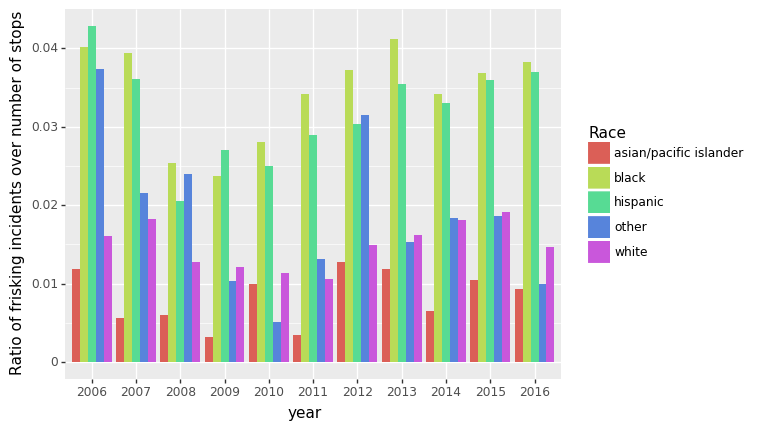

<ggplot: (8774446761141)>

In [466]:
year_frisk_race_pct  = year_frisk_race.merge(year_subject_race_count, left_on = ['year', 'race'], right_on=['year','subject_race'], how='inner', suffixes=('_left', '_right'))
year_frisk_race_pct.drop(['subject_race'], inplace=True, axis=1)
year_frisk_race_pct['pct_count']=year_frisk_race_pct['count_left'].div(year_frisk_race_pct['count_right'])
(ggplot(year_frisk_race_pct, aes(x='year',y='pct_count', fill='race')) 
  + geom_bar(stat='identity', position='dodge')
  + labs(x='year', y='Ratio of frisking incidents over number of stops', fill='Race'))

For Blacks and hispanics a stop ends up with frisking almost 30% or more of the time.